## Importações

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## EDA (Análise Exploratória dos Dados)

In [6]:
# Extract > Load
df = pd.read_excel("data/wbdata.xlsx")
df.head(5)

,country,population,surface,population.dens,national.income,national.income.cap,purchasing.power,purchasing.power.cap,gdp,gdp.cap
0,Afghanistan,37.2,652.9,57.0,20.3,550.00,73.0,1.96,1.0,-1.4
1,Albania,2.9,28.8,105.0,13.9,4.86,38.2,13.32,4.0,4.3
2,Algeria,42.2,2381.7,18.0,171.6,4.06,648.2,15.35,2.1,0.1
3,American Samoa,0.1,0.2,277.0,NaN,NaN,NaN,NaN,-5.4,-5.2
4,Andorra,0.1,0.5,164.0,NaN,NaN,NaN,NaN,1.6,1.6


In [31]:
# Describe raw data
def describe_df(dataframe):
  display(dataframe.describe())
  print("[SHAPE] rows: %s | columns: %s" %dataframe.shape)
  print("[DTYPEs]", {key: str(value) for key, value in dataframe.dtypes.to_dict().items()})
describe_df(df)

,population,surface,population.dens,national.income,national.income.cap,purchasing.power,purchasing.power.cap,gdp,gdp.cap
count,214.000000,213.000000,212.000000,192.000000,192.000000,192.000000,192.000000,203.000000,203.000000
mean,35.362150,619.727230,140.310792,432.073958,96.600521,692.918229,34.363958,3.122167,1.824631
std,137.574451,1841.907686,162.206065,1850.957315,219.982037,2557.432311,104.031204,3.126563,3.100987
min,0.000000,0.000000,0.000000,0.100000,1.010000,0.100000,1.030000,-11.200000,-12.100000
25%,0.825000,11.000000,28.750000,8.400000,3.847500,20.475000,5.622500,1.500000,0.500000
50%,6.750000,93.000000,82.000000,35.400000,9.465000,74.350000,14.195000,3.000000,1.800000
75%,25.075000,447.400000,202.750000,211.475000,41.027500,356.175000,31.205000,4.850000,3.700000
max,1392.700000,17098.300000,861.000000,20562.600000,960.000000,25266.100000,900.000000,25.100000,24.300000


[SHAPE] rows: 215 | columns: 10
[DTYPEs] {'country': 'object', 'population': 'float64', 'surface': 'float64', 'population.dens': 'float64', 'national.income': 'float64', 'national.income.cap': 'float64', 'purchasing.power': 'float64', 'purchasing.power.cap': 'float64', 'gdp': 'float64', 'gdp.cap': 'float64'}


In [90]:
# Clean and describe data
df = df.dropna()
describe_df(df)

,population,surface,population.dens,national.income,national.income.cap,purchasing.power,purchasing.power.cap,gdp,gdp.cap
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,39.437766,688.581383,133.831457,440.846809,95.761809,706.564894,34.617447,3.244149,1.905319
std,146.302004,1949.111362,151.915095,1869.651990,220.506062,2582.876031,105.080783,2.381753,2.360249
min,0.000000,0.000000,1.240000,0.100000,1.010000,0.100000,1.030000,-4.900000,-6.400000
25%,1.900000,20.100000,28.750000,8.825000,4.000000,22.600000,5.805000,1.700000,0.700000
50%,7.600000,111.950000,81.000000,37.300000,9.465000,75.450000,14.195000,3.100000,2.000000
75%,28.200000,507.700000,174.000000,216.450000,40.890000,367.525000,30.680000,4.900000,3.725000
max,1392.700000,17098.300000,759.000000,20562.600000,960.000000,25266.100000,900.000000,8.700000,7.100000


[SHAPE] rows: 188 | columns: 10
[DTYPEs] {'country': 'object', 'population': 'float64', 'surface': 'float64', 'population.dens': 'float64', 'national.income': 'float64', 'national.income.cap': 'float64', 'purchasing.power': 'float64', 'purchasing.power.cap': 'float64', 'gdp': 'float64', 'gdp.cap': 'float64'}


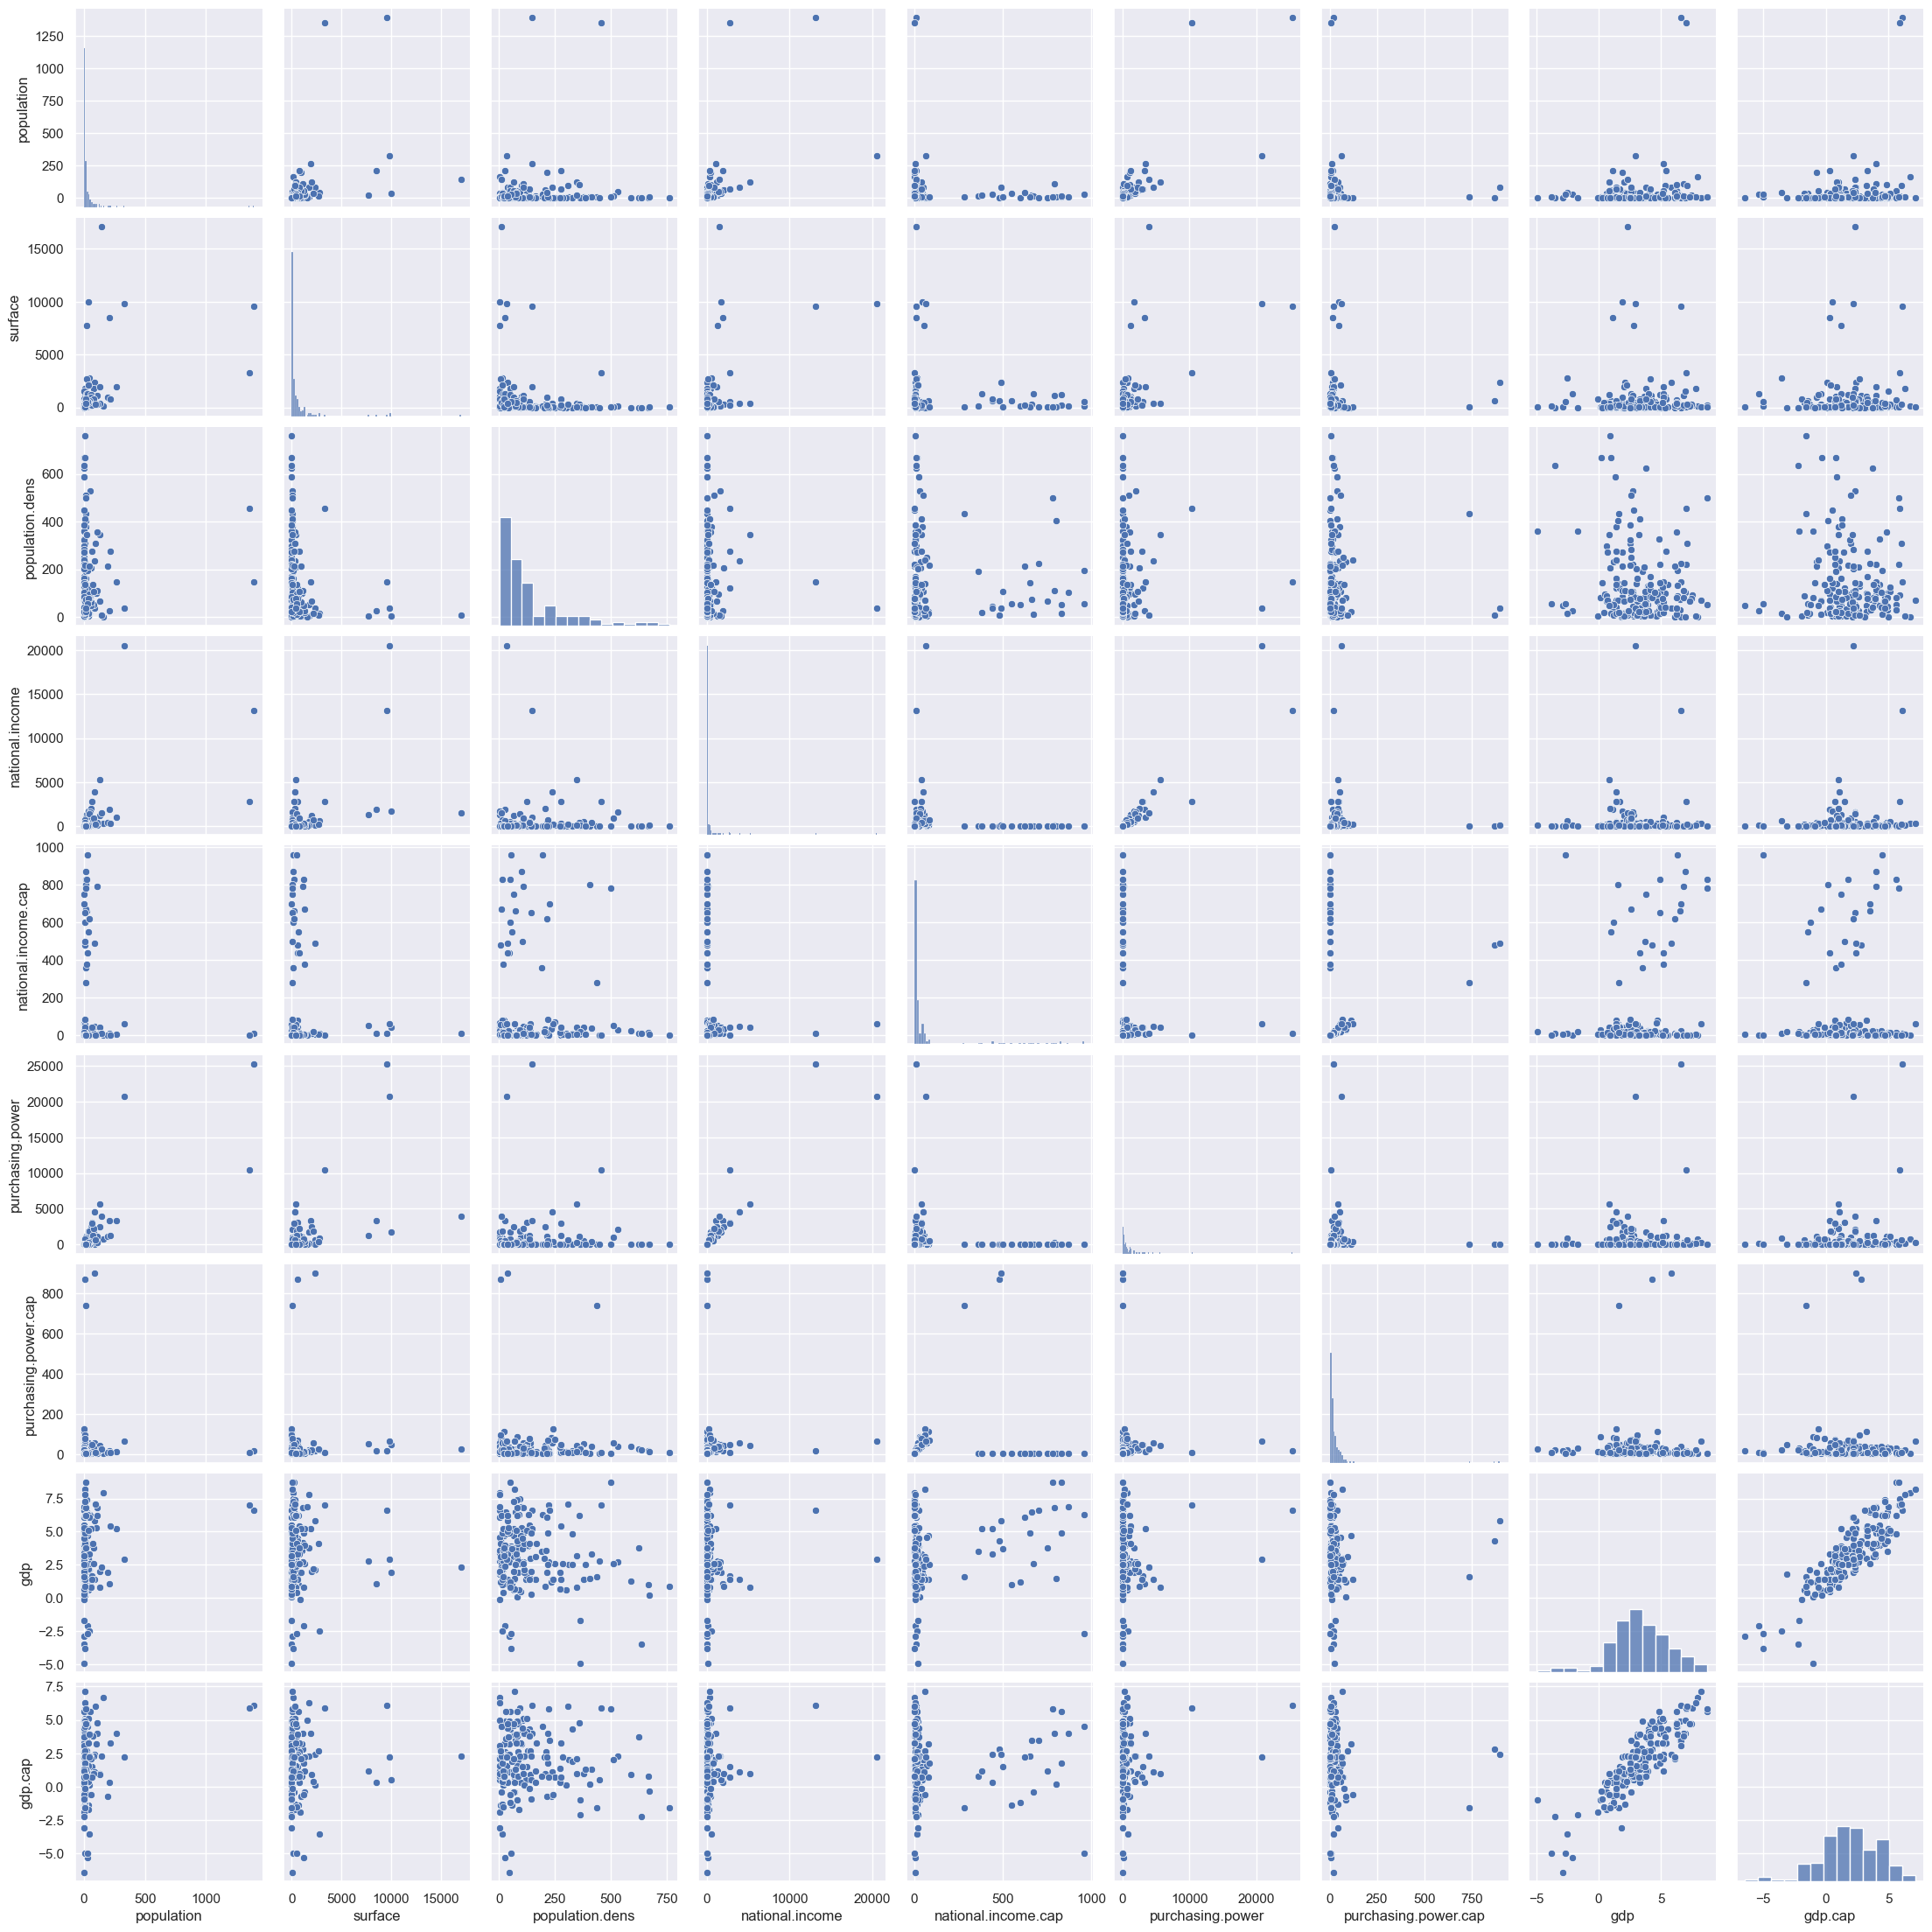

In [91]:
# relate characteristics
sns.pairplot(df)

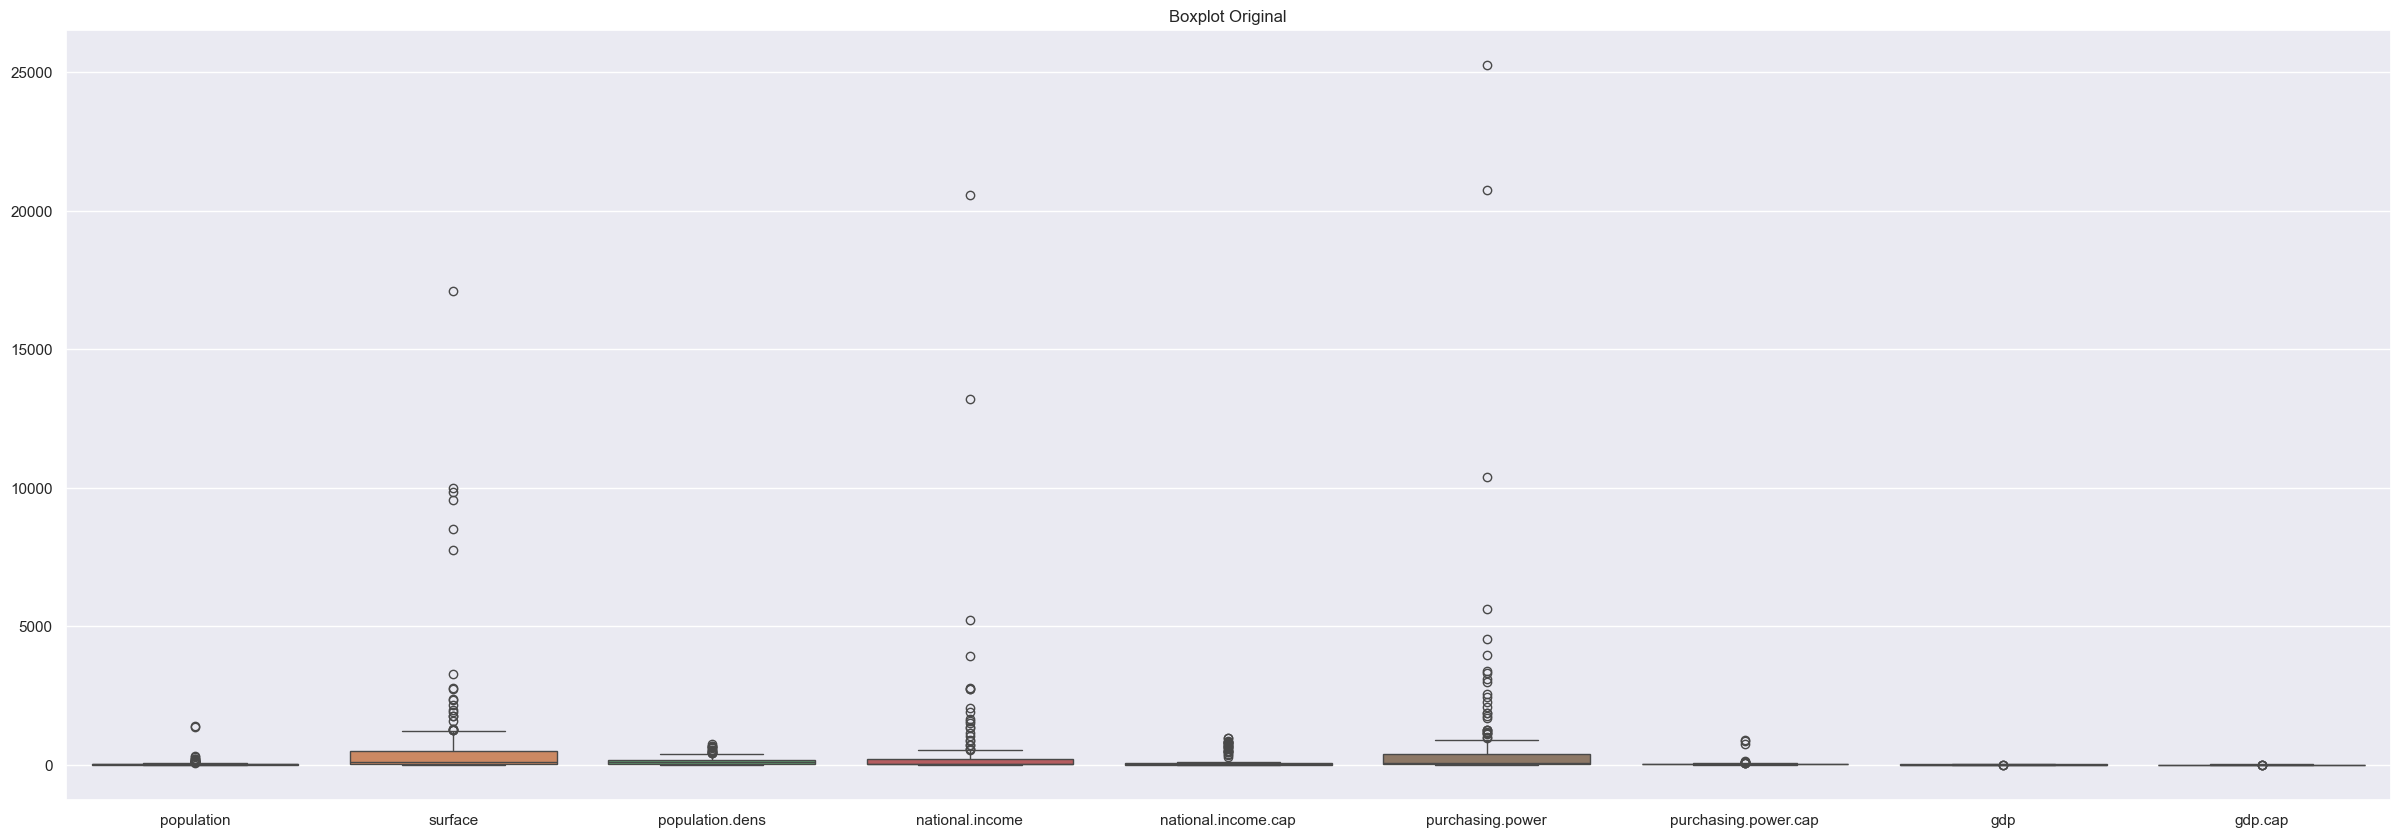

In [98]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df)
plt.title('Boxplot Original')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

divide by zero encountered in log

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

invalid value encountered in log



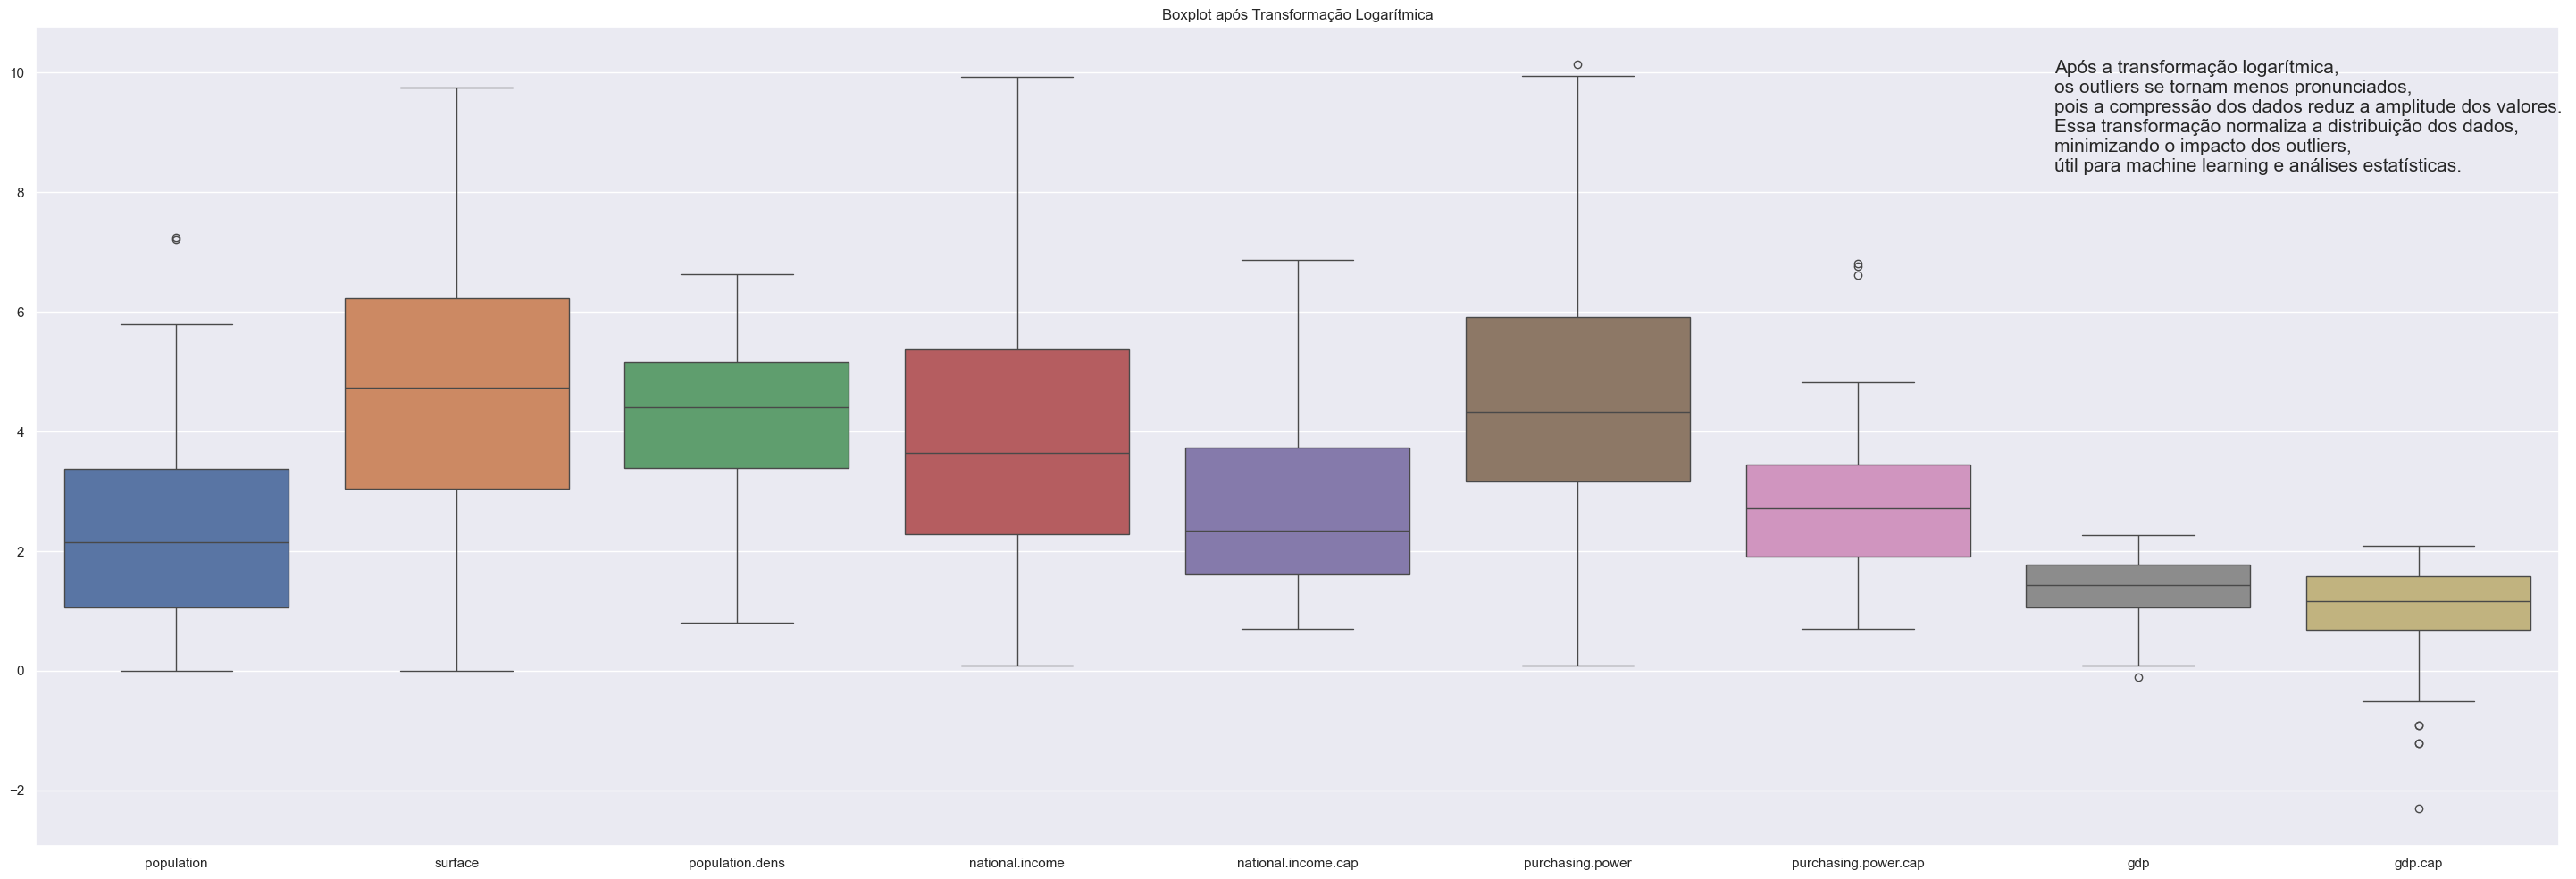

In [129]:

# log transformation in all numeric cols
df_log = np.log(df[df.columns[1:]]+1)   # Adiciona 1 para evitar log(0)

plt.figure(figsize=(30, 10))
sns.boxplot(data=df_log)
plt.title('Boxplot após Transformação Logarítmica')

describe = """
Após a transformação logarítmica, 
os outliers se tornam menos pronunciados,
pois a compressão dos dados reduz a amplitude dos valores. 
Essa transformação normaliza a distribuição dos dados, 
minimizando o impacto dos outliers,
útil para machine learning e análises estatísticas.
"""
plt.text(x=.8, y=.8, s=describe, fontsize=15, transform=plt.gca().transAxes)

# Mostrar o gráfico
plt.tight_layout()
plt.show()